## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
#Dropout_EXP = 0.25
Dropout_EXP = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [14]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}
lr = LEARNING_RATE 
for droprate in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with dropRate = %.2f" % (droprate))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio = droprate)
    model.summary()
    
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
     # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-droprate-%.2f-" % (droprate)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with dropRate = 0.20
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)        

Epoch 46/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.3898 - accuracy: 0.5028 - val_loss: 1.4164 - val_accuracy: 0.5012
Epoch 47/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.3805 - accuracy: 0.5027 - val_loss: 1.3793 - val_accuracy: 0.5155
Epoch 48/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.3841 - accuracy: 0.5000 - val_loss: 1.3880 - val_accuracy: 0.5130
Epoch 49/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.3838 - accuracy: 0.5050 - val_loss: 1.3905 - val_accuracy: 0.5080
Epoch 50/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.3728 - accuracy: 0.5063 - val_loss: 1.3783 - val_accuracy: 0.5103
Experiment with dropRate = 0.30
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___

50000/50000 [==============================] - 12s 231us/step - loss: 1.5669 - accuracy: 0.4321 - val_loss: 1.5271 - val_accuracy: 0.4608
Epoch 41/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.5704 - accuracy: 0.4336 - val_loss: 1.5209 - val_accuracy: 0.4687
Epoch 42/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.5706 - accuracy: 0.4317 - val_loss: 1.5133 - val_accuracy: 0.4646
Epoch 43/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.5675 - accuracy: 0.4330 - val_loss: 1.5221 - val_accuracy: 0.4586
Epoch 44/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.5619 - accuracy: 0.4355 - val_loss: 1.5122 - val_accuracy: 0.4615
Epoch 45/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.5613 - accuracy: 0.4373 - val_loss: 1.4985 - val_accuracy: 0.4754
Epoch 46/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.5573 - accuracy: 0.4390 - va

Epoch 35/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.7668 - accuracy: 0.3554 - val_loss: 1.7210 - val_accuracy: 0.3940
Epoch 36/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.7562 - accuracy: 0.3587 - val_loss: 1.7120 - val_accuracy: 0.4072
Epoch 37/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.7525 - accuracy: 0.3585 - val_loss: 1.7117 - val_accuracy: 0.4007
Epoch 38/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.7519 - accuracy: 0.3645 - val_loss: 1.7742 - val_accuracy: 0.3801
Epoch 39/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.7523 - accuracy: 0.3628 - val_loss: 1.7221 - val_accuracy: 0.4035
Epoch 40/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.7587 - accuracy: 0.3606 - val_loss: 1.7141 - val_accuracy: 0.4027
Epoch 41/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.7414 - accuracy:

Epoch 30/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.9455 - accuracy: 0.2748 - val_loss: 1.9992 - val_accuracy: 0.2841
Epoch 31/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.9376 - accuracy: 0.2778 - val_loss: 1.9668 - val_accuracy: 0.2858
Epoch 32/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.9403 - accuracy: 0.2743 - val_loss: 2.0135 - val_accuracy: 0.2862
Epoch 33/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.9391 - accuracy: 0.2758 - val_loss: 2.0016 - val_accuracy: 0.2967
Epoch 34/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.9370 - accuracy: 0.2775 - val_loss: 1.9989 - val_accuracy: 0.2926
Epoch 35/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.9348 - accuracy: 0.2794 - val_loss: 2.0277 - val_accuracy: 0.2794
Epoch 36/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.9384 - accuracy:

Epoch 25/50
50000/50000 [==============================] - 10s 203us/step - loss: 2.1862 - accuracy: 0.1543 - val_loss: 2.1796 - val_accuracy: 0.1821
Epoch 26/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.1873 - accuracy: 0.1561 - val_loss: 2.1824 - val_accuracy: 0.1738
Epoch 27/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.1838 - accuracy: 0.1559 - val_loss: 2.1824 - val_accuracy: 0.1826
Epoch 28/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.1828 - accuracy: 0.1584 - val_loss: 2.1793 - val_accuracy: 0.1909
Epoch 29/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.1807 - accuracy: 0.1573 - val_loss: 2.1625 - val_accuracy: 0.1896
Epoch 30/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.1840 - accuracy: 0.1554 - val_loss: 2.1645 - val_accuracy: 0.1739
Epoch 31/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.1810 - accuracy:

Epoch 20/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 21/50
50000/50000 [==============================] - 10s 203us/step - loss: 2.3027 - accuracy: 0.0962 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 22/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 23/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 24/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 25/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.3028 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 26/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.3028 - accuracy:

Epoch 15/50
50000/50000 [==============================] - 10s 204us/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 16/50
50000/50000 [==============================] - 10s 203us/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 17/50
50000/50000 [==============================] - 10s 201us/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 18/50
50000/50000 [==============================] - 10s 203us/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 19/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 20/50
50000/50000 [==============================] - 10s 199us/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 21/50
50000/50000 [==============================] - 10s 203us/step - loss: 2.3027 - accuracy:

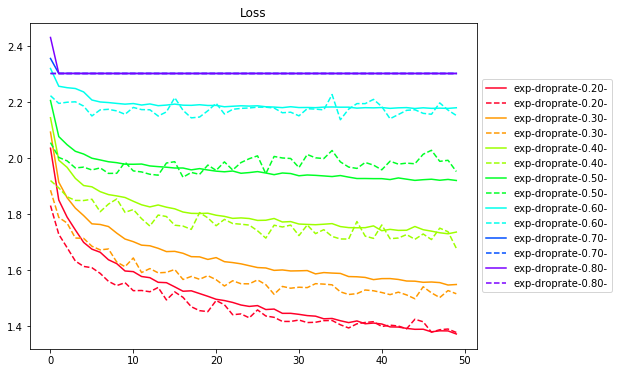

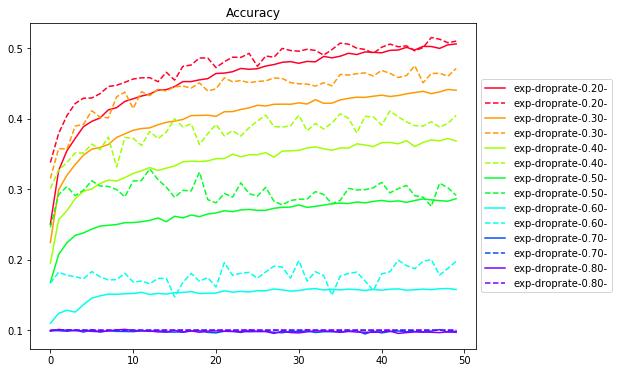

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()